In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [109]:
df = pd.read_csv("data.csv")
df


,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


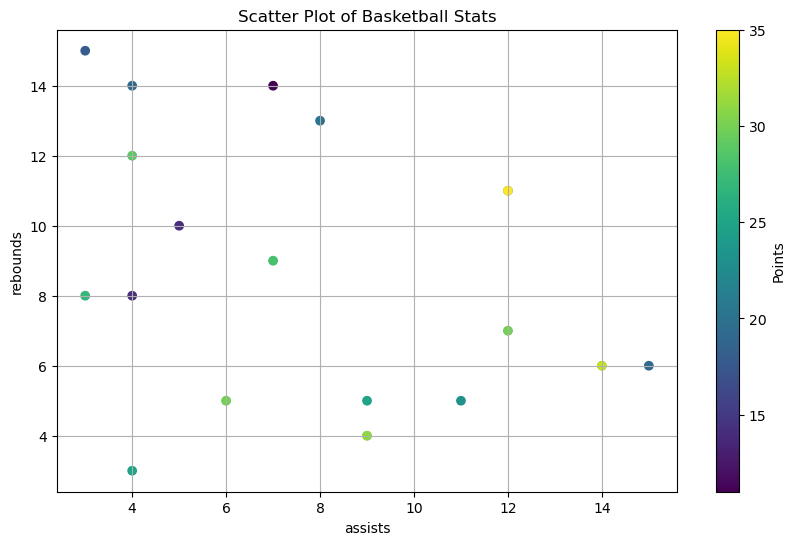

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(df['assists'], df['rebounds'], s=df['points'], alpha=1)

plt.title('Scatter Plot of Basketball Stats')
plt.xlabel('assists')
plt.ylabel('rebounds')

scatter = plt.scatter(df['assists'], df['rebounds'], c=df['points'], cmap='viridis', alpha=1)
plt.colorbar(scatter, label='Points')

plt.grid()
plt.show()

In [111]:
def euclidean(x, y):
    return np.sqrt(np.sum((np.array(x) - np.array(y)) ** 2))


In [112]:
def manhattan(point1, point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

In [113]:
def minkowski(point1, point2, p):
    return np.power(np.sum(np.abs(np.array(point1) - np.array(point2)) ** p), 1/p)


In [114]:
def kmeans(k, max_iterations=3):
    clusters = df.sample(k).values
    sse = []
    print(f"Initial clusters:\n{clusters}\n")

    for iteration in range(max_iterations):
        assignments = []

        for i in range(len(df)):
            distances = [euclidean(df.iloc[i].values, cluster) for cluster in clusters]
            assigned_cluster = np.argmin(distances)
            assignments.append(assigned_cluster)

        new_clusters = []
        for cluster_index in range(k):
            points_in_cluster = df.values[np.array(assignments) == cluster_index]
            if len(points_in_cluster) > 0:
                new_clusters.append(points_in_cluster.mean(axis=0))
            else:
                new_clusters.append(clusters[cluster_index])  
        clusters = np.array(new_clusters)
        print(f"Iteration {iteration + 1}:")
        print(f"Updated clusters:\n{clusters}\n")
    
        current_sse = sum(euclidean(df.iloc[i].values, clusters[assignments[i]])**2 for i in range(len(df)))
        sse.append(current_sse)
        
    return clusters, assignments , sse

In [115]:
def plot_clusters(k, clusters, assignments):
    plt.figure(figsize=(10, 6))
    for cluster_index in range(k):
        points_in_cluster = df.values[np.array(assignments) == cluster_index]
        plt.scatter(points_in_cluster[:, 1], points_in_cluster[:, 2], label=f'Cluster {cluster_index + 1}', alpha=0.5)
        plt.scatter(clusters[cluster_index][1], clusters[cluster_index][2], s=200, color='black', marker='X')  # Centroid

    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('Assists')
    plt.ylabel('Rebounds')
    plt.legend()
    plt.grid()
    plt.show()


Initial clusters:
[[30.  6.  5.]]

Iteration 1:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 2:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 3:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 4:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 5:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 6:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 7:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 8:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 9:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

Iteration 10:
Updated clusters:
[[23.94444444  7.61111111  8.61111111]]

SSE for K=1: 13475.0
Initial clusters:
[[29.  4. 12.]
 [19.  4. 14.]]

Iteration 1:
Updated clusters:
[[28.72727273  8.27272727  6.81818182]
 [16.42857143  6.57142857 11.42857143]]

Iteration 2:
Updated clusters:
[[28.72727273  8.27272727  6.81

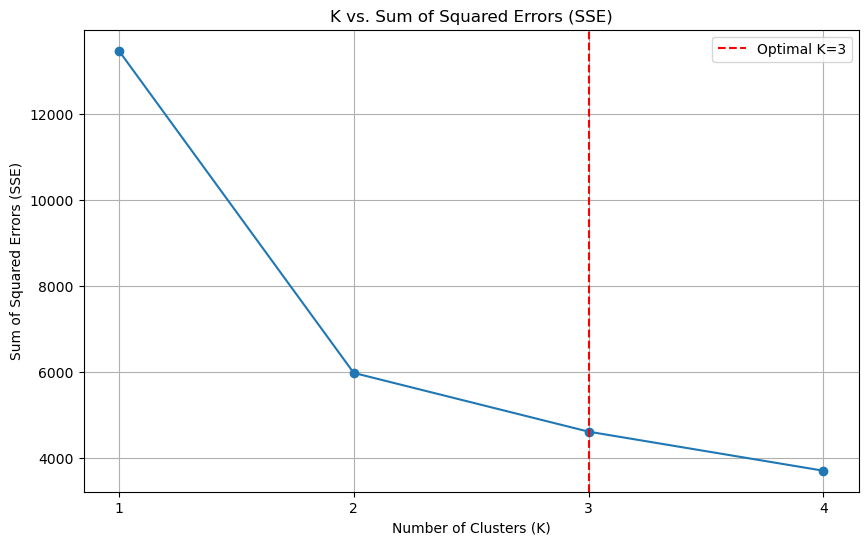

In [116]:
k_values = [1, 2, 3, 4]
sse_results = []

for k in k_values:
    clusters, assignments, sse = kmeans(k, max_iterations=10)
    total_sse = sum(sse)
    sse_results.append(total_sse)
    print(f"SSE for K={k}: {total_sse}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_results, marker='o')
plt.title('K vs. Sum of Squared Errors (SSE)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid()


optimal_k = k_values[np.argmin(np.diff(sse_results, 2)) + 1]
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
plt.legend()
plt.show()

Initial clusters:
[[33. 14.  6.]
 [30. 12.  7.]
 [11.  7. 14.]]

Iteration 1:
Updated clusters:
[[34.         13.          8.5       ]
 [26.7         8.          6.4       ]
 [16.          5.16666667 12.33333333]]

Iteration 2:
Updated clusters:
[[32.66666667 12.66666667  8.        ]
 [26.33333333  7.55555556  6.33333333]
 [16.          5.16666667 12.33333333]]

Iteration 3:
Updated clusters:
[[32.66666667 12.66666667  8.        ]
 [26.33333333  7.55555556  6.33333333]
 [16.          5.16666667 12.33333333]]

Iteration 4:
Updated clusters:
[[32.66666667 12.66666667  8.        ]
 [26.33333333  7.55555556  6.33333333]
 [16.          5.16666667 12.33333333]]

Iteration 5:
Updated clusters:
[[32.66666667 12.66666667  8.        ]
 [26.33333333  7.55555556  6.33333333]
 [16.          5.16666667 12.33333333]]

Iteration 6:
Updated clusters:
[[32.66666667 12.66666667  8.        ]
 [26.33333333  7.55555556  6.33333333]
 [16.          5.16666667 12.33333333]]

Iteration 7:
Updated clusters:
[[32

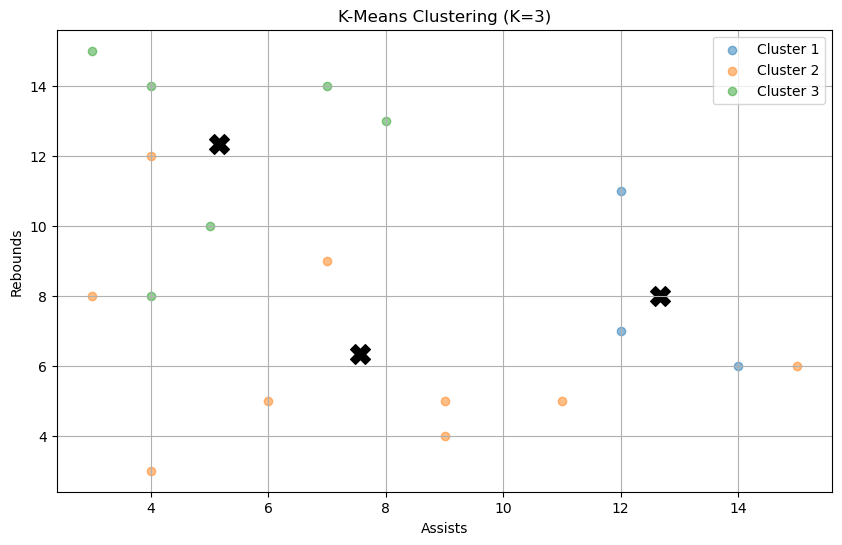

In [123]:
def kmeans(k, max_iterations=10):
    clusters = df.sample(k).values
    print(f"Initial clusters:\n{clusters}\n")

    for iteration in range(max_iterations):
        assignments = []

        # Assign points to the nearest cluster
        for i in range(len(df)):
            distances = [euclidean(df.iloc[i].values, cluster) for cluster in clusters]
            assigned_cluster = np.argmin(distances)
            assignments.append(assigned_cluster)

        new_clusters = []
        for cluster_index in range(k):
            points_in_cluster = df.values[np.array(assignments) == cluster_index]
            if len(points_in_cluster) > 0:
                new_clusters.append(points_in_cluster.mean(axis=0))
            else:
                new_clusters.append(clusters[cluster_index])  # Keep the old centroid if no points assigned
        clusters = np.array(new_clusters)

        print(f"Iteration {iteration + 1}:")
        print(f"Updated clusters:\n{clusters}\n")

    return clusters, assignments

# Function to plot clusters
def plot_clusters(k, clusters, assignments):
    plt.figure(figsize=(10, 6))
    for cluster_index in range(k):
        points_in_cluster = df.values[np.array(assignments) == cluster_index]
        plt.scatter(points_in_cluster[:, 1], points_in_cluster[:, 2], label=f'Cluster {cluster_index + 1}', alpha=0.5)
        plt.scatter(clusters[cluster_index][1], clusters[cluster_index][2], s=200, color='black', marker='X')  # Centroid

    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('Assists')
    plt.ylabel('Rebounds')
    plt.legend()
    plt.grid()
    plt.show()

# Set your desired values for K and maximum iterations
k = 3  # Change this to your desired number of clusters
max_iterations = 10  # Change this to your desired maximum iterations

# Run K-means and plot the clusters
final_clusters, final_assignments = kmeans(k, max_iterations)
plot_clusters(k, final_clusters, final_assignments)